In [1]:
import numpy as np
import netCDF4 as nc
import datetime as dt
from matplotlib import pyplot as plt
import pickle
import NorthNut as nn
%matplotlib inline

NorthNut defined variables: ig0,ig1,jg0,jg1,fformat0
NorthNut defined variables: vmask, vmask0, umask, umask0, tmask, fmask, gdept,  gdept_1d, e1t, e2t, e12t, e1f, e2f, e1v, e2u, e3t_1d
NorthNut defined variables: boxCol, colL, colR, arrowwidth, headwidth, headlength, alen, toff, apw, apk


In [2]:
fformat0='%Y%m%d'
#mod_start=dt.datetime(2015,1,1)
#mod_end=dt.datetime(2015,12,31)
mod_start=dt.datetime(2015,5,15)
mod_end=dt.datetime(2015,8,20)
savepath='../../save/transpDiscovery2'+mod_start.strftime(fformat0)+'-'+mod_end.strftime(fformat0)+'.pkl'
start2=dt.datetime(2015,5,15) # originally 5/15-8/15,  but changed to even number of fortnights (6, end is included)
end2=dt.datetime(2015,8,20)

In [17]:
data=pickle.load(open(savepath,'rb'))
mod_start=data['mod_start']
mod_end=data['mod_end']
#volT=data['volT']
no3T=data['no3T']
#no3=data['no3']
masks=data['masks']
gdept_1d=data['gdept_1d']
e3t_1d=data['e3t_1d']
#ulines=data['ulines']
vlines=data['vlines']
no3TD=data['no3TD']

In [4]:
data.keys(), no3T.keys()

(dict_keys(['mod_start', 'mod_end', 'volT', 'no3T', 'no3', 'masks', 'gdept_1d', 'e3t_1d', 'ulines', 'vlines', 'no3TD']),
 dict_keys(['N0', 'N', 'S']))

In [5]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2v=np.copy(fm.variables['e2v'])
    e1u=np.copy(fm.variables['e1u'])
    e2u=np.copy(fm.variables['e2u'])
    gdept_1d=fm.variables['gdept_1d'][0,:]
    e3t_1d=fm.variables['e3t_1d'][0,:]

In [6]:
tt=np.array([mod_start+dt.timedelta(hours=ii) for ii in range(0,int((mod_end-mod_start+dt.timedelta(days=1)).total_seconds()/3600))])

In [7]:
vlines

{'N0': {'i': (122, 132), 'j': 792},
 'N': {'i': (119, 132), 'j': 761},
 'S': {'i': (119, 132), 'j': 734}}

(49.5, 51)

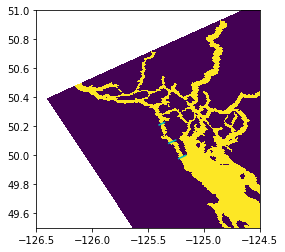

In [8]:
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.pcolormesh(navlon,navlat,tmask[0,0,:,:])
for el in vlines:
    j=vlines[el]['j']
    i0,i1=vlines[el]['i']
    ax.plot(navlon[j,i0:i1],navlat[j,i0:i1],'c-')
ax.set_xlim(-126.5,-124.5)
ax.set_ylim(49.5,51)

In [9]:
np.shape(no3T['N'])

(2352, 40, 13)

In [10]:
np.shape(masks['N'])

(40, 13)

In [11]:
np.arange(0,np.shape(masks['N'])[1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

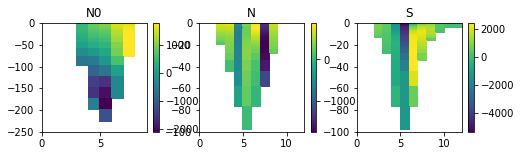

In [14]:
fig,ax=plt.subplots(1,3,figsize=(8,2))
m0=ax[0].pcolormesh(np.arange(0,np.shape(masks['N0'])[1]),-1*gdept_1d,np.ma.masked_where(masks['N0']==0,np.mean(no3T['N0'],0)/np.expand_dims(e3t_1d,1)))
ax[0].set_ylim(-250,0)
ax[0].set_title('N0')
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(np.arange(0,np.shape(masks['N'])[1]),-1*gdept_1d,np.ma.masked_where(masks['N']==0,np.mean(no3T['N'],0)/np.expand_dims(e3t_1d,1)))
ax[1].set_ylim(-100,0)
ax[1].set_title('N')
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(np.arange(0,np.shape(masks['S'])[1]),-1*gdept_1d,np.ma.masked_where(masks['S']==0,np.mean(no3T['S'],0)/np.expand_dims(e3t_1d,1)))
ax[2].set_ylim(-100,0)
ax[2].set_title('S')
plt.colorbar(m2,ax=ax[2])

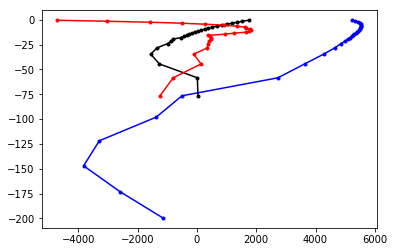

In [15]:
plt.plot(np.ma.masked_where(np.amax(masks['N0'],1)==0,np.mean(np.sum(no3T['N0'],2)/e3t_1d,0)),-1*gdept_1d,'b.-')
plt.plot(np.ma.masked_where(np.amax(masks['N'],1)==0,np.mean(np.sum(no3T['N'],2)/e3t_1d,0)),-1*gdept_1d,'k.-')
plt.plot(np.ma.masked_where(np.amax(masks['S'],1)==0,np.mean(np.sum(no3T['S'],2)/e3t_1d,0)),-1*gdept_1d,'r.-')

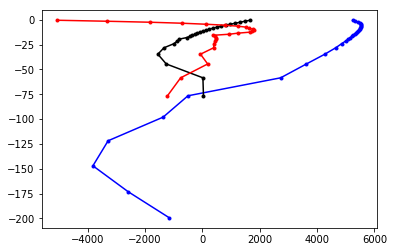

In [18]:
plt.plot(np.ma.masked_where(np.amax(masks['N0'],1)==0,np.mean(np.sum(no3TD['N0'],2)/e3t_1d,0)),-1*gdept_1d,'b.-')
plt.plot(np.ma.masked_where(np.amax(masks['N'],1)==0,np.mean(np.sum(no3TD['N'],2)/e3t_1d,0)),-1*gdept_1d,'k.-')
plt.plot(np.ma.masked_where(np.amax(masks['S'],1)==0,np.mean(np.sum(no3TD['S'],2)/e3t_1d,0)),-1*gdept_1d,'r.-')

/home/eolson/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


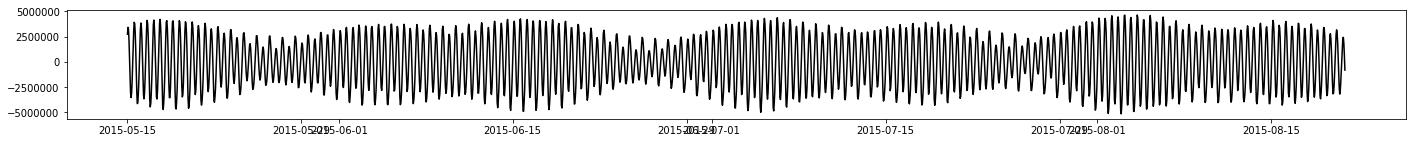

In [19]:
fig,ax=plt.subplots(1,1,figsize=(24,2))
ax.plot(tt,np.sum(np.sum(no3T['S'],2),1),'k-')

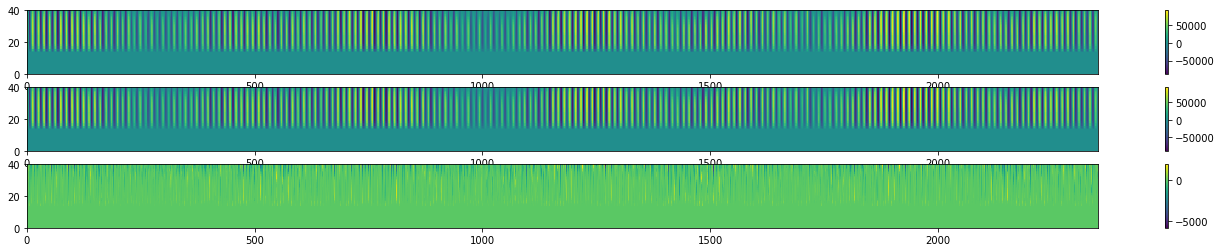

In [25]:
fig,ax=plt.subplots(3,1,figsize=(24,4))
m0=ax[0].pcolormesh(np.flipud(np.transpose(np.sum(no3T['S'],2)/np.expand_dims(e3t_1d,0))))
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(np.flipud(np.transpose(np.sum(no3TD['S'],2)/np.expand_dims(e3t_1d,0))))
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(np.flipud(np.transpose((np.sum(no3TD['S'],2)-np.sum(no3T['S'],2))/np.expand_dims(e3t_1d,0))))
plt.colorbar(m2,ax=ax[2])

In [28]:
# sum 2015 transps
print('NO3')
for ipath in no3T.keys():
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    no3TProfD=np.mean(np.sum(no3TD[ipath],2),0)
    print(ipath,'net direct:',np.sum(no3TProfD)*1e-9*24*3600,'net hourly:',np.sum(no3TProf)*1e-9*24*3600, 'Mmol/day')

NO3
N0 net direct: -3.2971503089188006 net hourly: -3.279428578870888 Mmol/day
N net direct: -2.8125440907891144 net hourly: -2.774686415927587 Mmol/day
S net direct: -2.1258936533413184 net hourly: -2.176391820368765 Mmol/day


In [30]:
# sum 2015 transps 6 layers
print('NO3')
for ipath in no3T.keys():
    no3TProf=np.mean(np.sum(no3T[ipath],2),0)
    no3TProfD=np.mean(np.sum(no3TD[ipath],2),0)
    print(ipath,'upper 6 levels, net direct:',np.sum(no3TProfD[:6])*1e-9*24*3600,'net hourly:',np.sum(no3TProf[:6])*1e-9*24*3600, 'Mmol/day')

NO3
N0 upper 6 levels, net direct: 2.813851909623549 net hourly: 2.8135484085988485 Mmol/day
N upper 6 levels, net direct: 0.6387554951809984 net hourly: 0.6634684003516247 Mmol/day
S upper 6 levels, net direct: -0.8679656621259171 net hourly: -0.7468593317201805 Mmol/day


(-100, 0)

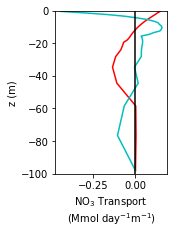

In [52]:
fig,ax=plt.subplots(1,1,figsize=(2,3))
iikb=np.sum(np.amax(masks['N'],1))+1
ax.plot(np.mean(np.sum(no3TD['N'],2)/e3t_1d,0)[:iikb]*1e-9*24*3600,-1*gdept_1d[:iikb],'r-')
iikb=np.sum(np.amax(masks['S'],1))+1
ax.plot(np.mean(np.sum(no3TD['S'],2)/e3t_1d,0)[:iikb]*1e-9*24*3600,-1*gdept_1d[:iikb],'c-')
ax.plot((0,0),(-100,0),'k-')
ax.set_xlabel('NO$_3$ Transport\n(Mmol day$^{-1}$m$^{-1}$)')
ax.set_ylabel('z (m)')
ax.set_ylim(-100,0)
#plt.plot(np.ma.masked_where(np.amax(masks['N0'],1)==0,np.mean(np.sum(no3TD['N0'],2)/e3t_1d,0)),-1*gdept_1d,'b.-')
#plt.plot(np.ma.masked_where(np.amax(masks['N'],1)==0,np.mean(np.sum(no3TD['N'],2)/e3t_1d,0)),-1*gdept_1d,'k.-')
#plt.plot(np.ma.masked_where(np.amax(masks['S'],1)==0,np.mean(np.sum(no3TD['S'],2)/e3t_1d,0)),-1*gdept_1d,'r.-')

In [41]:
np.mean(np.sum(no3TD['N'],2)/e3t_1d,0)[:iikb]

masked_array(data=[1669.9891997078691, 1477.9798682576622,
                   1318.983058082779, 1147.5959655333115,
                   972.5619392864154, 805.6925208062466,
                   649.2190314987248, 503.4247156440163,
                   367.8710321211526, 242.68552367870944,
                   126.76139911752766, 18.98992458323969,
                   -80.6559730264776, -173.45340467620665,
                   -261.36853585370494, -346.01384648432565,
                   -431.9562236924735, -553.6978806762739,
                   -801.8559781583963, -873.8455881436919,
                   -993.28807646636, -1341.0156967793266,
                   -1554.8847972821177, -1261.2906009265273,
                   17.672595472957234, 36.82787624852191, 0.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
       